# sklearn Regression - 수치예측

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
DF = pd.read_csv('https://raw.githubusercontent.com/rusita-ai/pyData/master/Insurance.csv')

In [3]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
DF.head(3)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


> # 1) 분석변수 선택

  * X: 'age', 'bmi', 'children'
  * y: 'expenses'

In [6]:
DF1 = DF[['expenses', 'age', 'bmi', 'children']]

In [7]:
DF1.head(3)

,expenses,age,bmi,children
0,16884.9240,19,27.90,0
1,1725.5523,18,33.77,1
2,4449.4620,28,33.00,3


> # 2) Train & Split

In [8]:
from sklearn. model_selection import train_test_split

In [9]:
X = DF1[['age', 'bmi', 'children']]
y = DF1['expenses']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

In [12]:
print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (936, 3) (936,)
Test Data :  (402, 3) (402,)


 # I. Multiariate Regression

> # 1) 모델 생성

In [16]:
%%time

from sklearn.linear_model import LinearRegression

MR = LinearRegression(normalize = True,
                      n_jobs = -1)

MR.fit(X_train, y_train)

CPU times: user 3.43 ms, sys: 1.22 ms, total: 4.65 ms
Wall time: 32.7 ms


> 2) 모델 평가

In [17]:
from sklearn.metrics import mean_squared_error

In [18]:
mean_squared_error(y_test, MR.predict(X_test))

114300134.03204554

# II. Ridge Regression

> # 1) 모델 생성

  * alpha: Regularization strength
    * default : 1.0
    * 값이 커지면 weight 값을 0에 가깝게 학습
    * 값이 작아지면 weight 값을 제한하지 않음
  * solver: Optimization Method
    * 'cholesy': Metrix Decomposition (숄레스키 행렬분해)
    * 'sag': Stochastic Average Gradient Descent
      * solver = 'sag'
      random_state = 2045
      max_iter = 1000

In [20]:
%%time
from sklearn.linear_model import Ridge
RG = Ridge(normalize = True,
           alpha = 0.3,
           solver = 'cholesky')

RG.fit(X_train, y_train)

CPU times: user 1.15 ms, sys: 1.89 ms, total: 3.04 ms
Wall time: 8.37 ms


> # 2) 모델 평가

In [21]:
mean_squared_error(y_test, RG.predict(X_test))

113578068.78448391

# III. Lasso Regression

> # 1) 모델생성

  * alpha : Regularization strength
    * default : 1.0
    * 값이 커지면 weight 값을 0에 가깝게 학습
    * 값이 작아지면 weight 값을 제한하지 않음


In [22]:
%%time
from sklearn.linear_model import Lasso
LS = Lasso(normalize = True, 
           alpha = 0.2)
   
LS.fit(X_train, y_train)

CPU times: user 6.05 ms, sys: 142 µs, total: 6.19 ms
Wall time: 9.41 ms


> # 2) 모델 평가

In [23]:
mean_squared_error(y_test, LS.predict(X_test))

114279766.62560357

# IV. ElasticNet Regression

> # 1) 모델생성

  * l1_ratio : default = 0.5

In [26]:
%%time
from sklearn.linear_model import ElasticNet

EN = ElasticNet(normalize = True,
                alpha = 0.001,
                l1_ratio = 0.7)

EN.fit(X_train, y_train)

CPU times: user 2.74 ms, sys: 0 ns, total: 2.74 ms
Wall time: 2.94 ms


> # 2) 모델 평가

In [28]:
mean_squared_error(y_test, EN.predict(X_test))

113571195.19021483

# V. Decision Tree Regressor

> # 1) 모델 생성

In [29]:
%%time
from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor(max_depth = 5,
                            criterion = 'mse')

DTR.fit(X_train, y_train)

CPU times: user 4.09 ms, sys: 759 µs, total: 4.85 ms
Wall time: 8.65 ms


> # 2) 모델 평가

In [30]:
mean_squared_error(y_test, DTR.predict(X_test))

140104079.12184906

> # 3) Feature Importance

In [31]:
DTR.feature_importances_

array([0.45047558, 0.48298996, 0.06653445])

In [32]:
import matplotlib.pyplot as plt


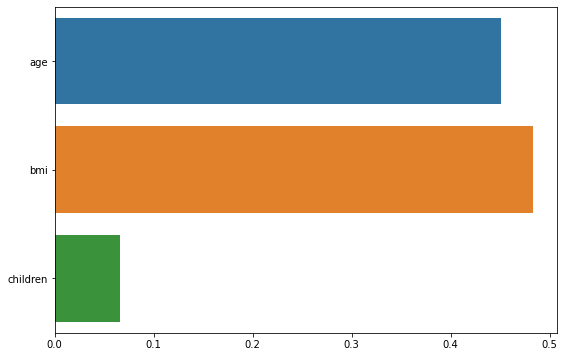

In [33]:
import seaborn as sns

plt.figure(figsize = (9, 6))
sns.barplot(DTR.feature_importances_,
            ['age', 'bmi', 'children'])
plt.show()

# VI.Random Forest Regressor

> # 1) 모델 생성

  * criterion: default = 'mse'
    * The function to measure the quality of a split

In [37]:
%%time

from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor(n_estimators = 2000,
                            max_features = 3,
                            max_depth = 1,
                            criterion = 'mse',
                            n_jobs = -1,
                            random_state = 2045)

RFR.fit(X_train, y_train)

CPU times: user 3.67 s, sys: 468 ms, total: 4.14 s
Wall time: 3.52 s


> # 2) 모델 평가

In [38]:
mean_squared_error(y_test, RFR.predict(X_test))

114282870.90114409

> # 3) Feature Importance

In [41]:
RFR.feature_importances_

array([0.794, 0.206, 0.   ])

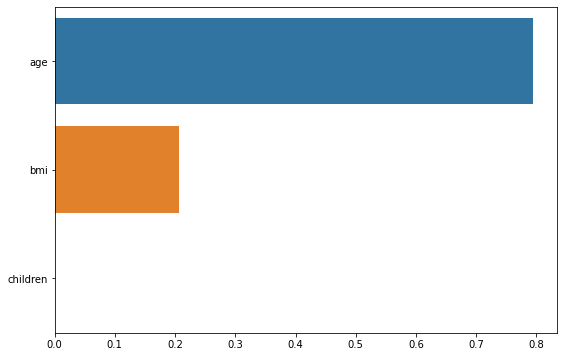

In [43]:
plt.figure(figsize = (9, 6))
sns.barplot(RFR.feature_importances_,
            ['age', 'bmi', 'children'])
plt.show()

# VII. Gradient Boosting Machine(GBM) Classifier

  * 이전 트리의 오차를 보완하는 방식으로 순차적으로 트리를 생성

> # 1) 모델 생성

  * loss: Optimization Method
    * 'ls': Least Squares Regression
  * n_estimators : 생성되는 트리의 수
    * 값이 크면 모델의 복잡도가 증가
    * 오차를 보정할 기회가 증가
  * learning_rate : 이전 트리의 오차를 얼마나 강한게 보정할 것인지 제어
    * 값이 크면 강한 보정에 의해 복잡한 트리 생성


In [45]:
%%time

from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(loss = 'ls',
                                n_estimators = 9000,
                                learning_rate = 0.0001,
                                criterion = 'mse',
                                max_features = 3,
                                max_depth = 1)

GBR.fit(X_train, y_train)

CPU times: user 4.5 s, sys: 1.54 ms, total: 4.5 s
Wall time: 4.59 s


> # 2) 모델 평가

In [46]:
mean_squared_error(y_test,GBR.predict(X_test))

118523943.40353537

> # 3) Feature Importance

In [47]:
GBR.feature_importances_

array([0.68958147, 0.31041853, 0.        ])

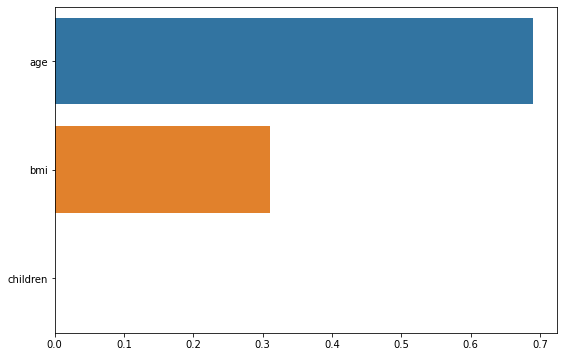

In [48]:
plt.figure(figsize = (9, 6))
sns.barplot(GBR.feature_importances_,
            ['age', 'bmi', 'children'])
plt.show()

# VIII. Adaptive Boosting Regressor
  * 이전 트리가 잘못 예측한 샘플에 가중치를 높여서 다음 트리를 훈련
  * 훈련된 모델은 성능에 따라 가중치가 부여

> # 1) 모델 생성

  * loss : The loss function to use when updating the weights after each boosting iteration
  * base_estimator = None
    * DecisionTreeRegressor
    * max_depth = 3
    * random_state = 2045

In [50]:
%%time

from sklearn.ensemble import AdaBoostRegressor

ABR = AdaBoostRegressor(loss = 'square',
                        n_estimators = 500,
                        learning_rate = 0.0001,
                        random_state = 2045)

ABR.fit(X_train, y_train)

CPU times: user 938 ms, sys: 2.76 ms, total: 940 ms
Wall time: 952 ms


> # 2) 모델 평가

In [51]:
mean_squared_error(y_test, ABR.predict(X_test))

118481893.52922821

> # 3) Feature Importance

In [52]:
ABR.feature_importances_

array([0.57474029, 0.3843226 , 0.04093711])

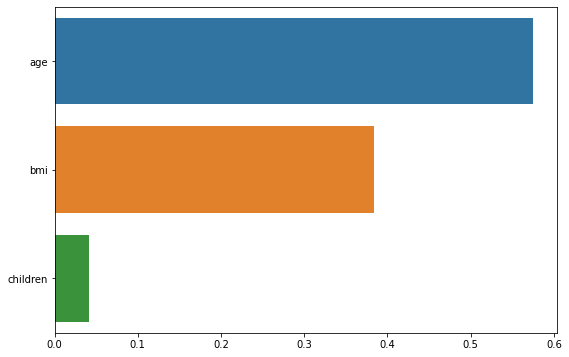

In [53]:
plt.figure(figsize = (9, 6))
sns.barplot(ABR.feature_importances_,
            ['age', 'bmi', 'children'])
plt.show()

# IX. Extra Gradient Boost(XGBoost) Classifier

> # 1) 모델 생성

In [54]:
%%time
from xgboost import XGBRegressor

XGB = XGBRegressor(booster = 'gblinear',
                   n_estimators = 100,
                   learning_rate = 0.4,
                   reg_lambda = 2.0,
                   n_jobs = -1)

XGB.fit(X_train, y_train)

[02:24:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 44.8 ms, sys: 14.8 ms, total: 59.6 ms
Wall time: 130 ms


> # 2) 모델 평가

In [56]:
mean_squared_error(y_test, XGB.predict(X_test))

112756532.4037124

# X. LightGBM Regressor

> 1) 모델 생성

In [58]:
%%time

from lightgbm import LGBMRegressor

LGB = LGBMRegressor(linear_tree = True,
                    boosting_type = 'gbdt',
                    objective = 'regression',
                    n_estimators = 500,
                    learning_rate = 0.001,
                    max_depth = 2,
                    n_jobs = -1)

LGB.fit(X_train, y_train)

CPU times: user 112 ms, sys: 10.1 ms, total: 122 ms
Wall time: 86.6 ms


> # 2) 모델 평가

In [59]:
mean_squared_error(y_test, LGB.predict(X_test))

119555446.90396042

> # 3) Feature Importance

In [60]:
LGB.feature_importances_

array([909, 591,   0])

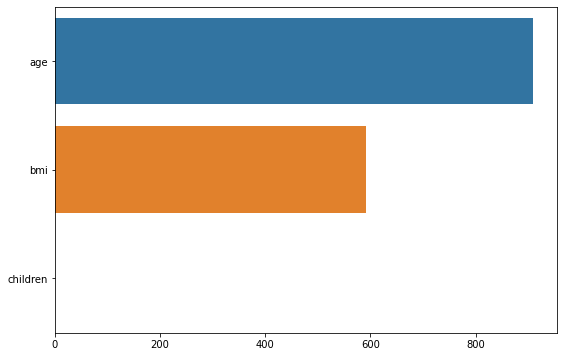

In [61]:
plt.figure(figsize = (9, 6))
sns.barplot(LGB.feature_importances_,
            ['age', 'bmi', 'children'])
plt.show()